# Perceptron

Source : 
- https://www.youtube.com/playlist?list=PLO_fdPEVlfKoanjvTJbIbd9V5d9Pzp8Rw

In [1]:
%cd C:\Users\kelia\Python

C:\Users\kelia\Python


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 0)
y = y.reshape((y.shape[0], 1))

dimensions de X: (100, 2)
dimensions de y: (100, 1)


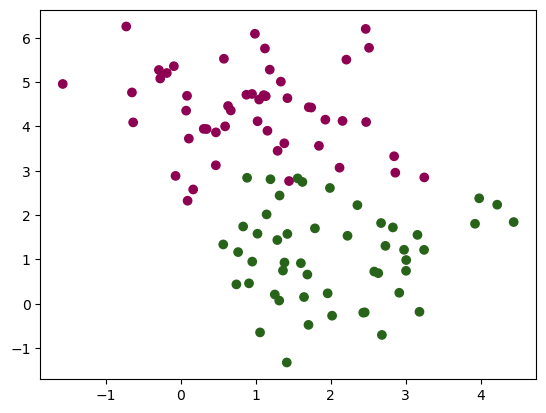

In [4]:
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG')
plt.show()

In [5]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [6]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [7]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [8]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [9]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [10]:
# On fait le predict en bool, c'est a dire que si la valeur A est >= .5 
# qui est le seuil de la sigmoide, on obtiendra True (ce qui veut dire que y=1)
def predict(X, W, b):
    A = model(X, W, b)
    #print('La probabilite que y soit classe comme 1 est de :', A)
    return A >= 0.5

In [11]:
from sklearn.metrics import accuracy_score
#ajout d'une barre de progression

from tqdm import tqdm

In [12]:
def artificial_neuron(X_train, y_train, learning_rate=0.1, n_iter=100):
    # initialiser W, b
    W, b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    
#     test_loss = []
#     test_acc = []
    
    for i in tqdm(range(n_iter)):
        
        #Activations
        A = model(X_train, W, b)
        
        if i %10 == 0: #On met a jour le loss et le calcul d'accuracy toutes les 
                       #10 iterations (i%10 == 0 veut dire si i est un multiple
                       #de 10, alors on fait la suite).
                       #Ca permet de gagner en performance si on fait beaucoup
                       #d'iterations (n_iter)
            #Calcul du cout pour train
            train_loss.append(log_loss(A, y_train))
            #Calcul de la performance du modele (accuracy) pour train
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
#             #Calcul du cout pour test
#             A_test = model(X_test, W, b)
#             test_loss.append(log_loss(A_test, y_test))
#             #Calcul de la performance du modele (accuracy) pour test
#             y_pred = predict(X_test, W, b)
#             test_acc.append(accuracy_score(y_test, y_pred))
        
        #Descente de gradient
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
        
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
#     plt.plot(test_loss, label='test loss')
    plt.title('Courbes des fonctions coût')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
#     plt.plot(test_acc, label='test accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.show()
    print(f'Accuracy final score : {train_acc[-1]} pour un learning_rate de {learning_rate} et {n_iter} iterations')
    
    return(W, b)

On vérifie si notre artificial neuron apprend bien en regardant la courbe de Log Loss qui est censée diminuer avec les itérations.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

100%|██████████| 100/100 [00:00<00:00, 7686.52it/s]


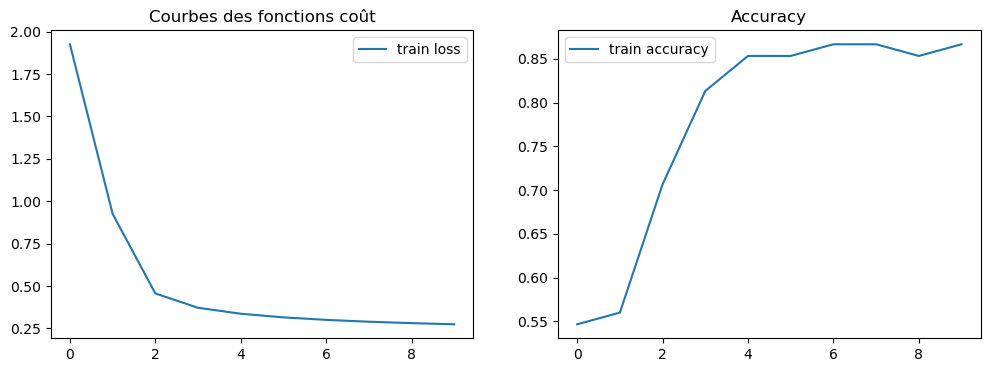

Accuracy final score : 0.8666666666666667 pour un learning_rate de 0.1 et 100 iterations


In [14]:
W, b = artificial_neuron(X_train, y_train)

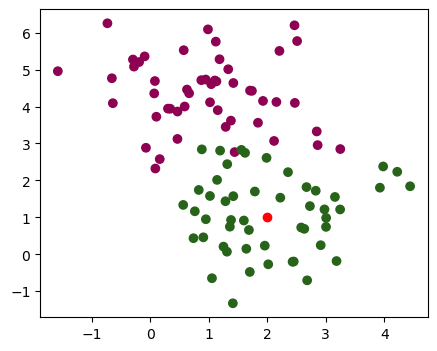

array([ True])

In [15]:
new_plant = np.array([2, 1])
plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

predict(new_plant, W, b)

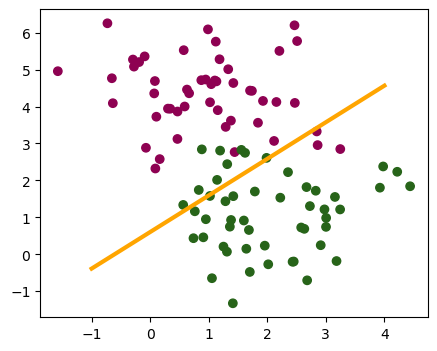

In [16]:
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

In [17]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [18]:
X_train, y_train, X_test, y_test = load_data()

In [19]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [20]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [21]:
print(y_train[:5])
print(y_test[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]


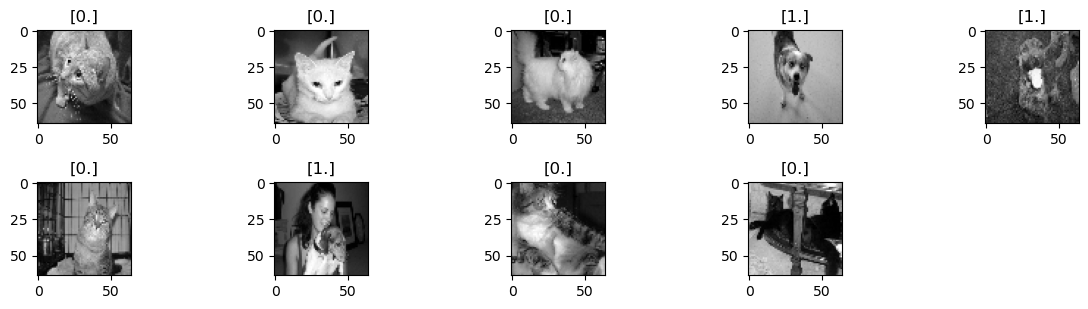

In [22]:
plt.figure(figsize=(12,6))

for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [23]:
X_train[1]

array([[42, 43, 39, ..., 47, 46, 42],
       [38, 44, 42, ..., 40, 47, 42],
       [45, 46, 36, ..., 43, 40, 38],
       ...,
       [87, 85, 70, ..., 75, 78, 82],
       [70, 70, 71, ..., 52, 67, 68],
       [64, 61, 60, ..., 55, 52, 55]], dtype=uint8)

In [24]:
#Vient de la normalisation min/max qui est (X - Xmin) / (Xmax - Xmin) 
#Comme Xmin est 0 on a X / Xmax

X_train2 = X_train / X_train.max()
X_test2 = X_test / X_train.max()

In [25]:
mean, std = X_train.mean(), X_train.std()
X_train3 = (X_train - mean) / std
X_test3 = (X_test - mean) / std
print("X_train :\n", X_train3[:5],"\n", "X_test :\n", X_test3[:5])

X_train :
 [[[ 0.72039092  0.87579086  0.70485092 ...  0.40959103  0.20757111
    0.25419109]
  [ 0.68931093  0.87579086  1.00011081 ...  0.39405104  0.40959103
    0.16095113]
  [ 0.62715095  0.79809089  1.07781078 ...  0.62715095  0.39405104
    0.51837099]
  ...
  [ 0.89133085  0.78255089  0.75147091 ... -0.41402866  0.90687085
    0.86025086]
  [ 0.7670109   0.75147091  0.75147091 ... -1.12886839  1.0311908
    0.09879115]
  [ 0.90687085  0.84471087  0.78255089 ... -0.47618863  0.96903082
   -1.22210835]]

 [[-1.17548837 -1.15994838 -1.22210835 ... -1.0977884  -1.1133284
   -1.17548837]
  [-1.23764835 -1.14440838 -1.17548837 ... -1.20656836 -1.0977884
   -1.17548837]
  [-1.12886839 -1.1133284  -1.26872834 ... -1.15994838 -1.20656836
   -1.23764835]
  ...
  [-0.47618863 -0.50726862 -0.74036854 ... -0.66266856 -0.61604858
   -0.55388861]
  [-0.74036854 -0.74036854 -0.72482854 ... -1.02008843 -0.78698852
   -0.77144852]
  [-0.8336085  -0.88022848 -0.89576848 ... -0.97346845 -1.0200884

In [26]:
print("X_train :\n", X_train2[:5],"\n", "X_test :\n", X_test2[:5])

X_train :
 [[[0.64566929 0.68503937 0.64173228 ... 0.56692913 0.51574803 0.52755906]
  [0.63779528 0.68503937 0.71653543 ... 0.56299213 0.56692913 0.50393701]
  [0.62204724 0.66535433 0.73622047 ... 0.62204724 0.56299213 0.59448819]
  ...
  [0.68897638 0.66141732 0.65354331 ... 0.35826772 0.69291339 0.68110236]
  [0.65748031 0.65354331 0.65354331 ... 0.17716535 0.72440945 0.48818898]
  [0.69291339 0.67716535 0.66141732 ... 0.34251969 0.70866142 0.15354331]]

 [[0.16535433 0.16929134 0.15354331 ... 0.18503937 0.18110236 0.16535433]
  [0.1496063  0.17322835 0.16535433 ... 0.15748031 0.18503937 0.16535433]
  [0.17716535 0.18110236 0.14173228 ... 0.16929134 0.15748031 0.1496063 ]
  ...
  [0.34251969 0.33464567 0.27559055 ... 0.29527559 0.30708661 0.32283465]
  [0.27559055 0.27559055 0.27952756 ... 0.20472441 0.26377953 0.26771654]
  [0.2519685  0.24015748 0.23622047 ... 0.21653543 0.20472441 0.21653543]]

 [[0.10629921 0.1023622  0.11417323 ... 0.33070866 0.32283465 0.33070866]
  [0.114173

In [27]:
print(X_train2.min(), X_train2.max())

0.0 1.0


In [28]:
#.reshape(..., -1) le -1 revient a faire X_train2.shape[1] * X_train2.shape[2] parce que ca prend tout le reste
X_train2_flat = X_train2.reshape(X_train2.shape[0], -1)
X_train2_flat.shape

(1000, 4096)

In [29]:
X_test2_flat = X_test2.reshape(X_test2.shape[0], -1)
X_test2_flat.shape

(200, 4096)

100%|██████████| 1000/1000 [00:03<00:00, 259.02it/s]


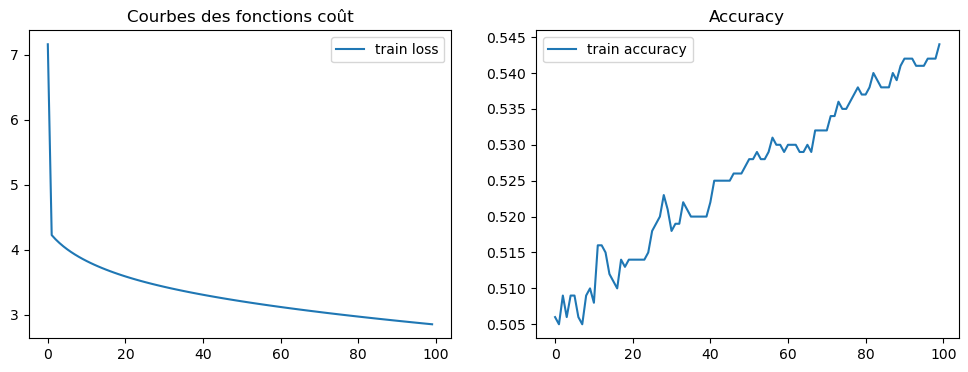

Accuracy final score : 0.544 pour un learning_rate de 0.01 et 1000 iterations


In [30]:
W, b = artificial_neuron(X_train2_flat, y_train, learning_rate=0.01, n_iter=1000)

Learning rate : 0.01


100%|██████████| 1000/1000 [00:03<00:00, 255.97it/s]


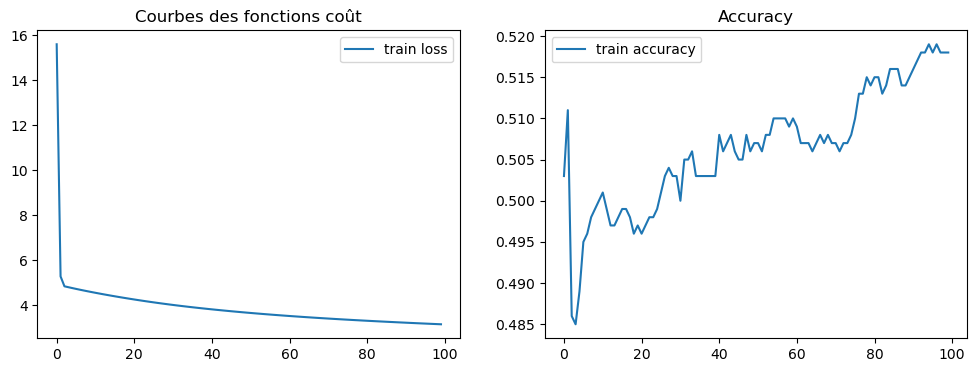

Accuracy final score : 0.518 pour un learning_rate de 0.01 et 1000 iterations
Learning rate : 0.02


100%|██████████| 1000/1000 [00:03<00:00, 259.05it/s]


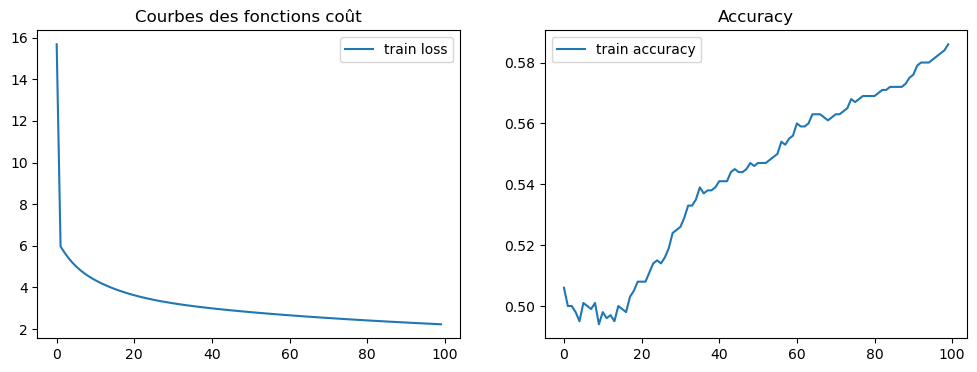

Accuracy final score : 0.586 pour un learning_rate de 0.02 et 1000 iterations
Learning rate : 0.03


100%|██████████| 1000/1000 [00:03<00:00, 261.12it/s]


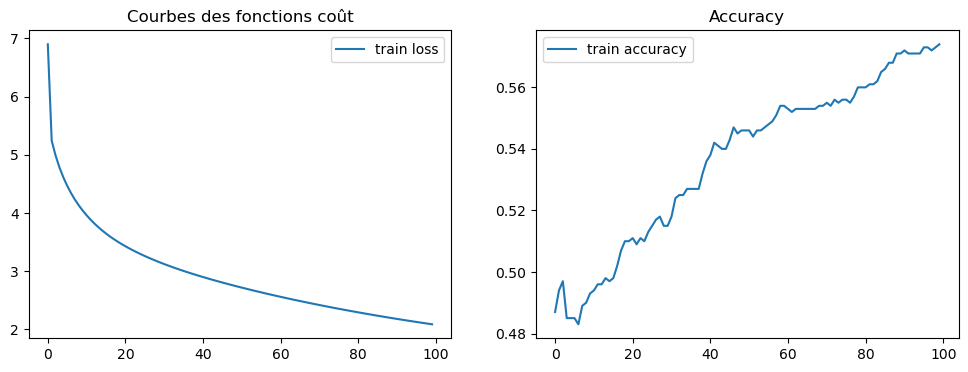

Accuracy final score : 0.574 pour un learning_rate de 0.03 et 1000 iterations
Learning rate : 0.04


100%|██████████| 1000/1000 [00:03<00:00, 262.62it/s]


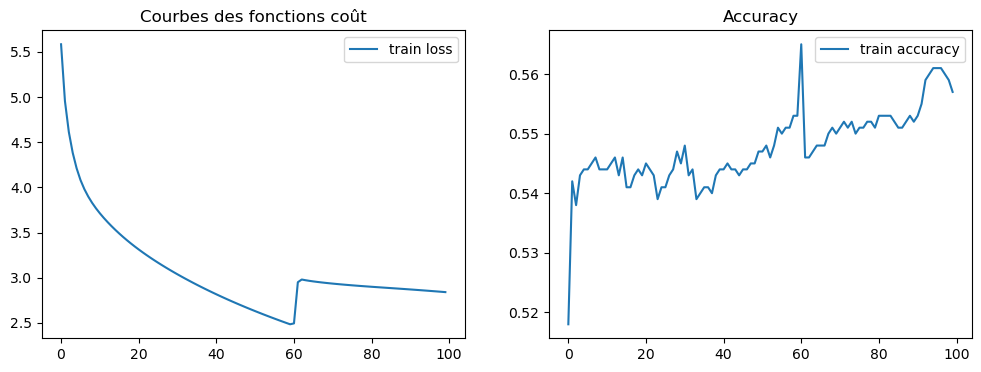

Accuracy final score : 0.557 pour un learning_rate de 0.04 et 1000 iterations
Learning rate : 0.05


100%|██████████| 1000/1000 [00:03<00:00, 258.54it/s]


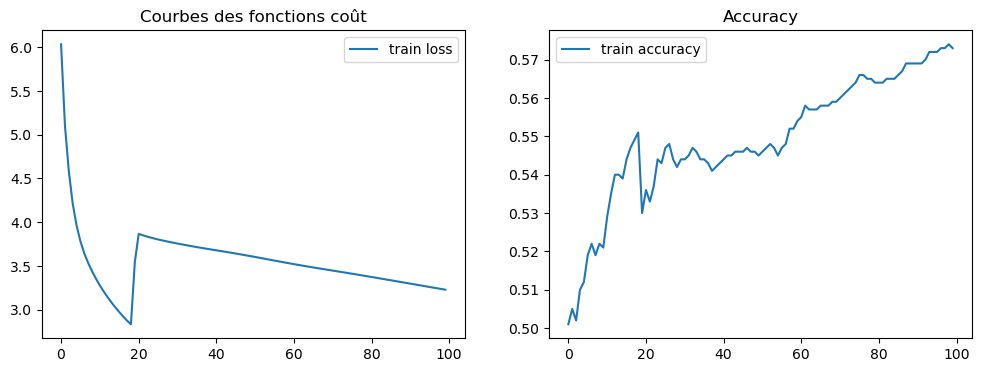

Accuracy final score : 0.573 pour un learning_rate de 0.05 et 1000 iterations
Learning rate : 0.060000000000000005


100%|██████████| 1000/1000 [00:03<00:00, 255.92it/s]


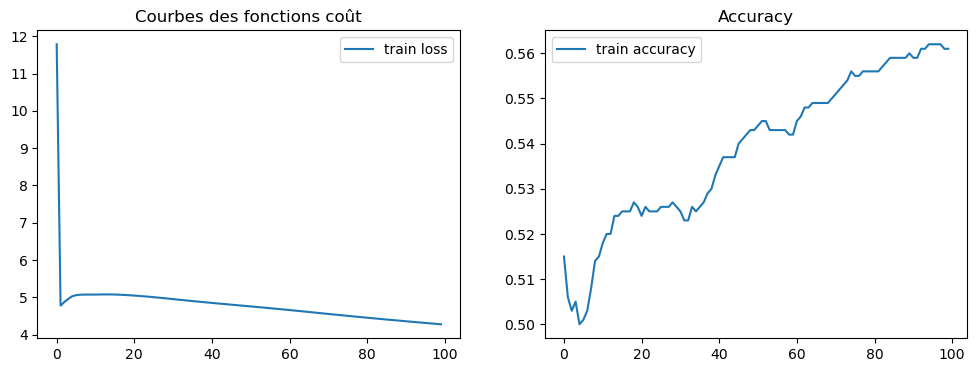

Accuracy final score : 0.561 pour un learning_rate de 0.060000000000000005 et 1000 iterations
Learning rate : 0.06999999999999999


100%|██████████| 1000/1000 [00:03<00:00, 257.44it/s]


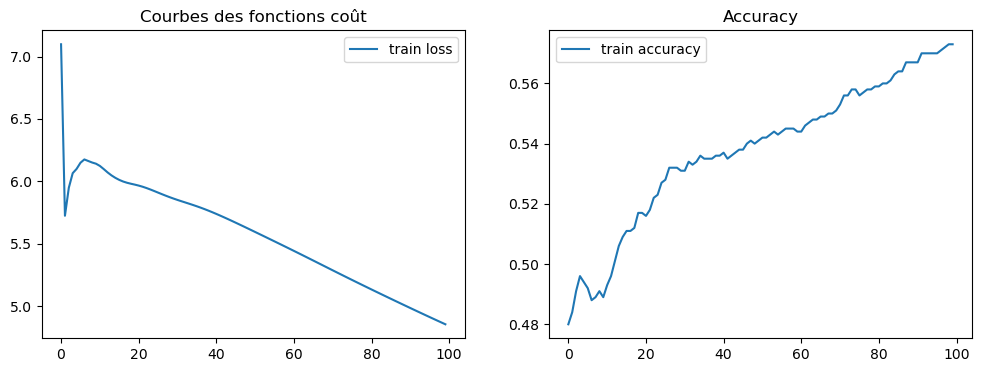

Accuracy final score : 0.573 pour un learning_rate de 0.06999999999999999 et 1000 iterations
Learning rate : 0.08


100%|██████████| 1000/1000 [00:03<00:00, 258.50it/s]


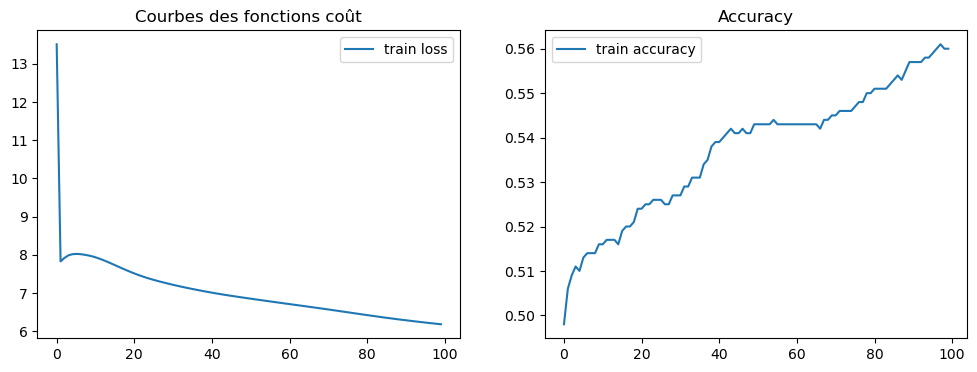

Accuracy final score : 0.56 pour un learning_rate de 0.08 et 1000 iterations
Learning rate : 0.09


100%|██████████| 1000/1000 [00:03<00:00, 258.81it/s]


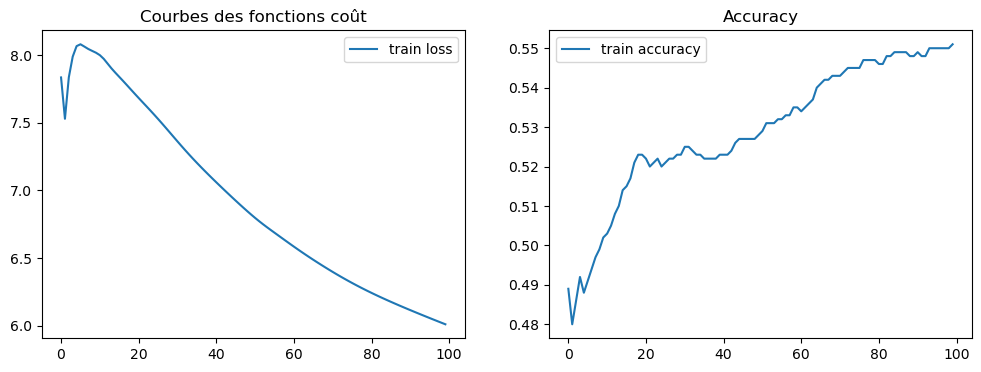

Accuracy final score : 0.551 pour un learning_rate de 0.09 et 1000 iterations


In [31]:
# Test de l'évolution de l'accuracy quand on change le learning rate
for rate in np.arange(0.01, 0.1, 0.01):
    print(f'Learning rate : {rate}')
    artificial_neuron(X_train2_flat, y_train, learning_rate = rate, n_iter=1000)

**Pour vérifier si notre modèle n'overfit pas nos données, il faut à la fois visualiser la loss function sur notre train set et sur notre test set. Je vais ajouter le test dans artificial_neuron2().**

In [32]:
def artificial_neuron2(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    # initialiser W, b
    W, b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        
        #Activations
        A = model(X_train, W, b)
        
        if i %10 == 0: #On met a jour le loss et le calcul d'accuracy toutes les 
                       #10 iterations (i%10 == 0 veut dire si i est un multiple
                       #de 10, alors on fait la suite).
                       #Ca permet de gagner en performance si on fait beaucoup
                       #d'iterations (n_iter)
            #Calcul du cout pour train
            train_loss.append(log_loss(A, y_train))
            #Calcul de la performance du modele (accuracy) pour train
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            

            #Calcul du cout pour test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            #Calcul de la performance du modele (accuracy) pour test
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        #Descente de gradient
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
        
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.title('Courbes des fonctions coût')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.plot(test_acc, label='test accuracy')
    plt.title('Courbes des Accuracy')
    plt.legend()
    
    plt.show()
    print(f'Accuracy final score : {train_acc[-1]} pour un learning_rate de {learning_rate} et {n_iter} iterations')
    
    return(W, b)

100%|██████████| 10000/10000 [00:41<00:00, 238.87it/s]


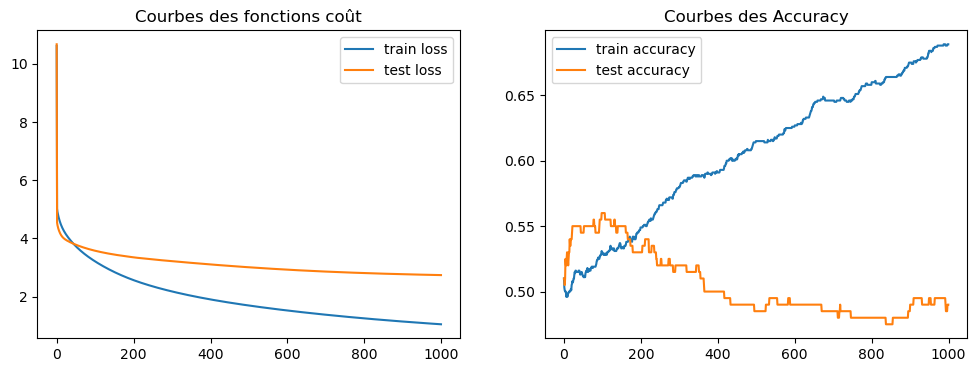

Accuracy final score : 0.689 pour un learning_rate de 0.01 et 10000 iterations


In [33]:
W, b = artificial_neuron2(X_train2_flat, y_train, X_test2_flat, y_test, learning_rate=0.01, n_iter=10000)

D'après l'évolution des 4 courbes, il y a effectivement un peu d'overfitting.
- On peut voir que la courbe de test loss stagne alors que notre train loss continue de baisser légèrement. 
    >*Pour rappel, la log loss représente l'évolution de l'erreur*.
- On peut voir que la courbe d'accuracy pour notre test set stagne également et même diminue vers la fin, \
ce qui veut dire que le modèle n'arrive pas à améliorer ses prédictions / prédit de moins en moins bien sur \
le test set car notre modèle capte trop de bruit sur le train set.

# Réseau de neurone

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.metrics import accuracy_score

#ajout d'une barre de progression
from tqdm import tqdm

In [35]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2, 
        'b2' : b2
    }
    return parametres

In [36]:
def forward_propagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1' : A1,
        'A2' : A2
    }
    
    return activations

In [37]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [38]:
def back_propagation(X, y, activations, parametres):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [39]:
def update(gradients, parametres, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2,
    }
    
    return parametres

In [40]:
# On fait le predict en bool, c'est a dire que si la valeur A est >= .5 
# qui est le seuil de la sigmoide, on obtiendra True (ce qui veut dire que y=1)
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [41]:
#n1 correspond au nombre de neurone que l'on veut ajouter a notre network

def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    
    # initialiser W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    
    
    for i in tqdm(range(n_iter)):
        
        #Activations
        activations = forward_propagation(X_train, parametres)
                
        #Back propagation
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i %10 == 0: 
            #Calcul du cout pour train
            train_loss.append(log_loss(y_train, activations['A2']))
            #Calcul de la performance du modele (accuracy) pour train
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.title('Courbes des fonctions cout')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.show()
    print(f'Accuracy final score : {train_acc[-1]} pour un learning_rate de {learning_rate} et {n_iter} iterations')
    
    return parametres

dimensions de x (2, 100)
dimensions de y (1, 100)


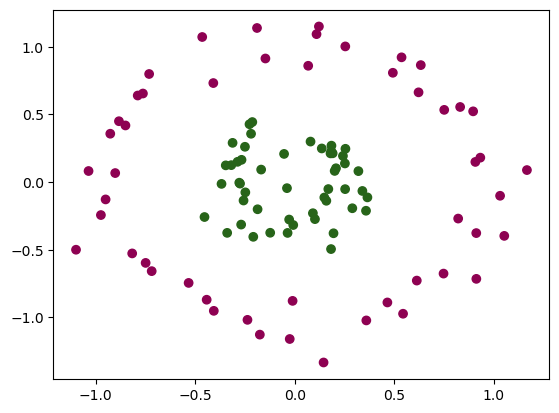

In [42]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de x', X.shape)
print('dimensions de y', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='PiYG')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4949.42it/s]


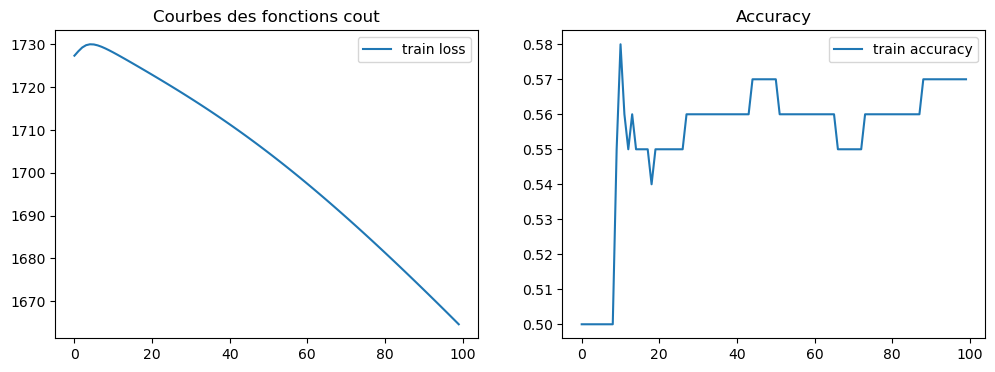

Accuracy final score : 0.57 pour un learning_rate de 0.1 et 1000 iterations


In [43]:
params = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

100%|██████████| 10000/10000 [00:01<00:00, 5218.35it/s]


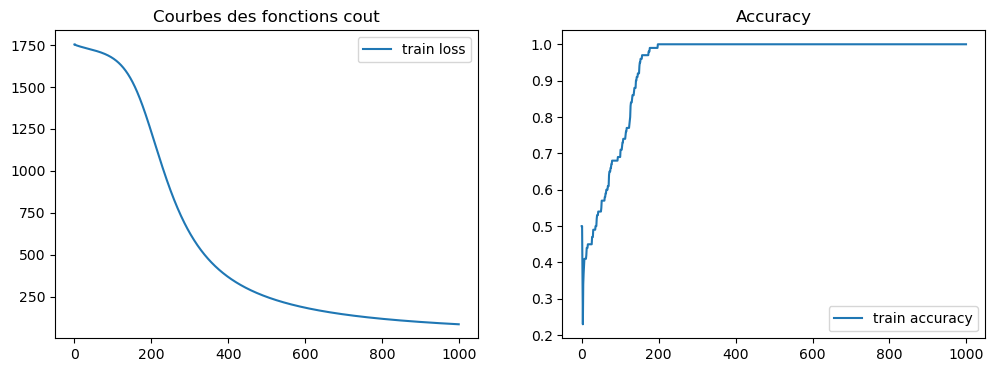

Accuracy final score : 1.0 pour un learning_rate de 0.1 et 10000 iterations


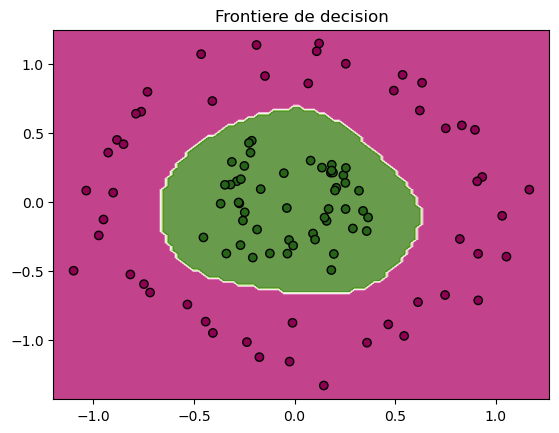

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tqdm import tqdm

# Generation des donnees
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

# Fonction pour visualiser les frontieres de decision
def plot_decision_boundary(X, y, predict, parametres):
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()].T
    predictions = predict(grid_points, parametres)
    predictions = predictions.reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.8, cmap='PiYG')
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), cmap='PiYG', edgecolor='k')
    plt.title("Frontiere de decision")
    plt.show()

# Neural network simplifie
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return (A2 > 0.5).astype(int)

# Appel du reseau et visualisation
n1 = 8  # Exemple avec 4 neurones dans la couche cachee
parametres = neural_network(X, y, n1, learning_rate=0.1, n_iter=10000)

# Visualisation des frontieres de decision
plot_decision_boundary(X, y, predict, parametres)

# Meilleur code pour le réseau de neurone, permet d'avoir le nombre d'itération minimal pour maximiser l'accuracy

In [45]:
def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    # Initialiser W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    max_acc = 0
    min_iter_for_max_acc = None
    
    for i in tqdm(range(n_iter)):
        # Activations
        activations = forward_propagation(X_train, parametres)
                
        # Back propagation
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        # Enregistrement de l'accuracy
        y_pred = predict(X_train, parametres)
        current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
        
        if i % 10 == 0:  # Tous les 10 iterations, on enregistre les metriques
            train_loss.append(log_loss(y_train, activations['A2']))
            train_acc.append(current_accuracy)
        
        # Mise à jour du maximum d'accuracy
        if current_accuracy > max_acc:
            max_acc = current_accuracy
            min_iter_for_max_acc = i
    
    # Tracer les courbes de cout et d'accuracy
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.title('Courbes des fonctions cout')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.show()
    
    # Afficher les resultats finaux
    print(f'Accuracy final score : {train_acc[-1]} pour un learning_rate de {learning_rate} et {n_iter} iterations')
    print(f'Accuracy maximale : {max_acc} atteinte a l\'iteration {min_iter_for_max_acc}')
    
    return parametres, min_iter_for_max_acc


100%|██████████| 10000/10000 [00:07<00:00, 1423.28it/s]


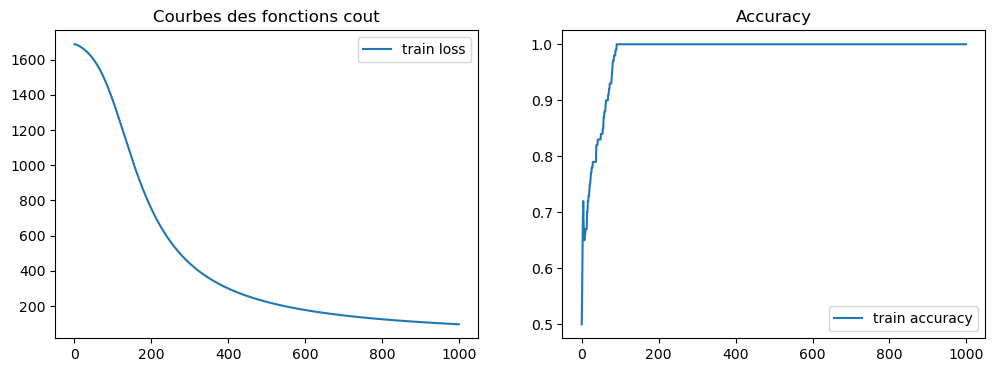

Accuracy final score : 1.0 pour un learning_rate de 0.1 et 10000 iterations
Accuracy maximale : 1.0 atteinte a l'iteration 901


In [46]:
parametres, min_iter = neural_network(X, y, n1=4, learning_rate=0.1, n_iter=10000)

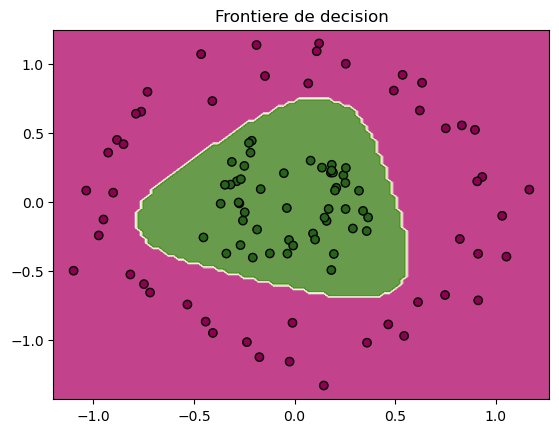

In [47]:
plot_decision_boundary(X, y, predict, parametres)

# Deep neural network

In [82]:
# Generation des donnees
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

In [83]:
def initialisation(dimensions):
    parametres = {}    
    C = len(dimensions)
    
    # Initialisation des poids et des biais
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1])  # dimensions[c] -> nombre de neurones de la couche actuelle, dimensions[c-1] -> nombre de neurones de la couche précédente
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)  # Un vecteur colonne pour chaque couche
        
    return parametres

In [84]:
parametres = initialisation([2, 32, 32, 1])

for key, val in parametres.items():
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


In [85]:
def forward_propagation(X, parametres):
    activations = {'A0' : X}
    C = len(parametres) // 2   # On divise le nombre de paramètres W, b par 2 pour avoir le nombre de couches
    
    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))   # Sigmoïde
    
    return activations

In [86]:
activations = forward_propagation(X, parametres)

for key, val in activations.items():
    print(key, val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


In [87]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [88]:
def back_propagation(y, activations, parametres):
    
    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}
    
    for c in reversed(range(1, C+1)):
        gradients['dW' + str(c)] = (1 / m) * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
    
    return gradients

In [89]:
grad = back_propagation(y, activations, parametres)

for key, val in grad.items():
    print(key, val.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


In [90]:
def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2
    
    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parametres

In [91]:
# On fait le predict en bool, c'est a dire que si la valeur A est >= .5 
# qui est le seuil de la sigmoide, on obtiendra True (ce qui veut dire que y=1)

def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    A_final = activations['A' + str(C)]
    return (A_final >= 0.5).astype(int)  # Seuil de classification


In [92]:
#n1 correspond au nombre de neurone que l'on veut ajouter a notre network

def neural_network(X, y, hidden_layers = (32, 32 ,32), learning_rate=0.1, n_iter=1000):
    
    np.random.seed(0)
    # initialiser W, b
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)
    
    train_loss = []
    train_acc = []
    
    
    for i in tqdm(range(n_iter)):
        
        #Activations
        activations = forward_propagation(X, parametres)
                
        #Back propagation
        gradients = back_propagation(y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i %10 == 0: 
            #Calcul du cout pour train
            C = len(parametres) // 2
            y_pred = predict(X, parametres)

            #Calcul de la perte (log loss)
            train_loss.append(log_loss(y, activations['A' + str(C)]))

            #Calcul de la performance du modele (accuracy) pour train
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    ax[0].plot(train_loss, label="Train Loss", color="darkorange")
    ax[0].set_title("Évolution de la fonction coût")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Log Loss")
    ax[0].legend()

    ax[1].plot(train_acc, label="Train Accuracy", color="royalblue")
    ax[1].set_title("Évolution de la précision")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()
    
    plt.show()
    print(f'Accuracy final score : {train_acc[-1]} pour un learning_rate de {learning_rate} et {n_iter} iterations')
    
    return parametres

## Test du deep neural network sur le dataset breast cancer

### Train set

In [93]:
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Charger et preparer le dataset
data = load_breast_cancer()
X, y = data.data, data.target  # y = 0 ou 1

In [94]:
# Convertir X et y en DataFrame ou Series pour les manipuler avec pandas
X_df = pd.DataFrame(X, columns=data.feature_names)
y_series = pd.Series(y)

# Verification globale si toute la matrice a des NaN
print("\nNaN dans X ?")
print(X_df.isnull().any().any())  # True si au moins une valeur NaN dans X

print("\nNaN dans y ?")
print(y_series.isnull().any())  # True si y contient des NaN


NaN dans X ?
False

NaN dans y ?
False


C:\Users\kelia\AppData\Local\Temp\ipykernel_18104\849469295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


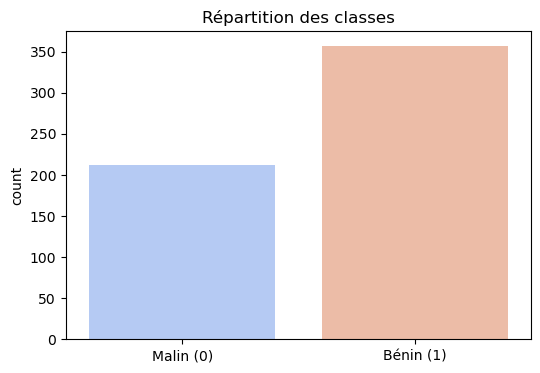

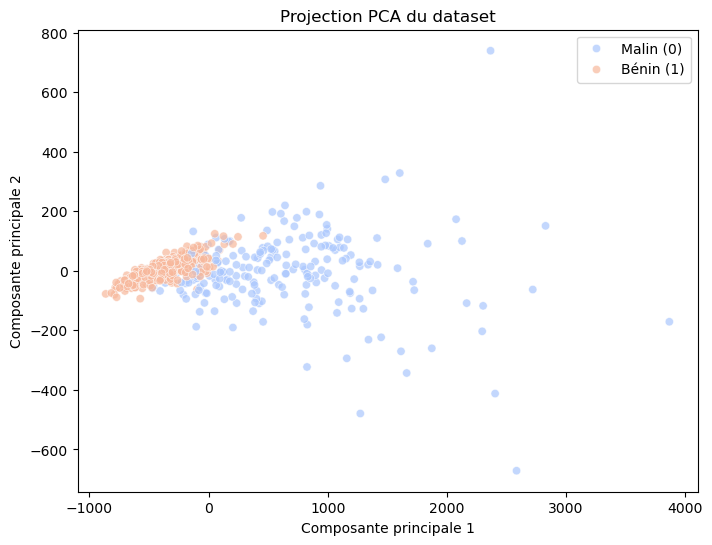

In [95]:
from sklearn.decomposition import PCA

# Distribution des classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Malin (0)", "Bénin (1)"])
plt.title("Répartition des classes")
plt.show()

# Reduction de dimension avec PCA pour visualisation 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA du dataset")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Malin (0)", "Bénin (1)"])
plt.show()

In [96]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Normalisation des donnees
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.min(), X.max())

-3.1120847879199744 12.072680399588076


In [97]:
from sklearn.model_selection import train_test_split

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Transposer les donnees pour correspondre a la forme attendue par le reseau
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.reshape(1, -1), y_test.reshape(1, -1)

100%|██████████| 1000/1000 [00:01<00:00, 852.32it/s]


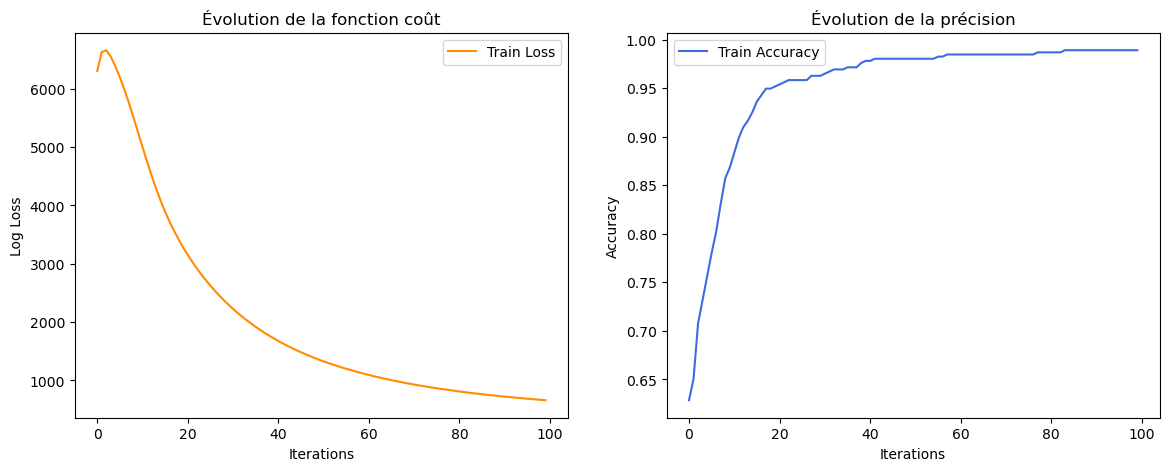

Accuracy final score : 0.989010989010989 pour un learning_rate de 0.1 et 1000 iterations


In [99]:
hidden_layers = (32, 16, 8)  # Architecture personnalisee
learning_rate = 0.1
n_iter = 1000

parametres = neural_network(X_train, y_train, hidden_layers=hidden_layers, learning_rate=learning_rate, n_iter=n_iter)

### Test set

In [100]:
# Predictions sur le test set
y_pred_test = predict(X_test, parametres)

# Evaluation du modele
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(y_test.flatten(), y_pred_test.flatten())

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9649


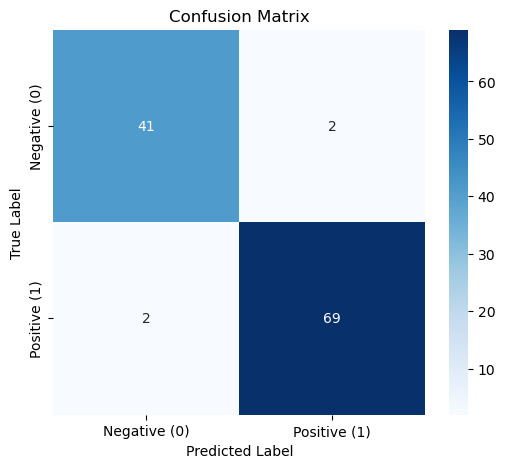

In [101]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test.flatten(), y_pred_test.flatten())

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (0)", "Positive (1)"], yticklabels=["Negative (0)", "Positive (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()